In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import re
import seaborn as sns

In [2]:
df=pd.read_csv('CaseData.csv',parse_dates=['Sale_Date'])
df.head()

,ID,Sale_Date,Vessel_Name,Sale_Price,Year_Built,Sale_Years,Weight,Capesize
0,1,Jan-07,Lowlands Beilun,73.0,1999,8,170.2,4647
1,2,Jan-07,CHS Moon,45.0,1991,16,150.2,4647
2,3,Jan-07,Spring Brave,62.0,1995,12,151.1,4647
3,4,Jan-07,Martha Verity,60.0,1995,12,158.0,4647
4,5,Jan-07,TMT TBN,61.3,1993,14,174.7,4647


In [3]:
df.shape

(48, 8)

In [4]:
df['Sale_Month']=df.Sale_Date.apply(lambda row: ''.join(re.findall(r"\D{3}",row)))

In [5]:
df.head()

,ID,Sale_Date,Vessel_Name,Sale_Price,Year_Built,Sale_Years,Weight,Capesize,Sale_Month
0,1,Jan-07,Lowlands Beilun,73.0,1999,8,170.2,4647,Jan
1,2,Jan-07,CHS Moon,45.0,1991,16,150.2,4647,Jan
2,3,Jan-07,Spring Brave,62.0,1995,12,151.1,4647,Jan
3,4,Jan-07,Martha Verity,60.0,1995,12,158.0,4647,Jan
4,5,Jan-07,TMT TBN,61.3,1993,14,174.7,4647,Jan


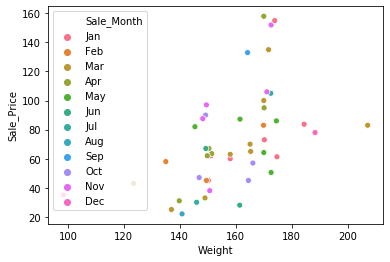

In [7]:
sns.scatterplot(data=df,x='Weight',y='Sale_Price',hue='Sale_Month')
plt.show()

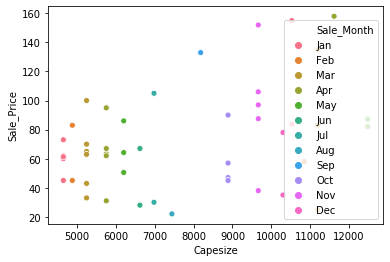

In [8]:
sns.scatterplot(data=df,x='Capesize',y='Sale_Price',hue='Sale_Month')
plt.show()

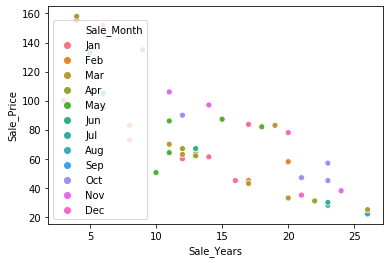

In [9]:
sns.scatterplot(data=df,x='Sale_Years',y='Sale_Price',hue='Sale_Month')
plt.show()

In [6]:
df_new=df.drop(['ID','Sale_Date','Vessel_Name'],axis=1)
df_new.head()

,Sale_Price,Year_Built,Sale_Years,Weight,Capesize,Sale_Month
0,73.0,1999,8,170.2,4647,Jan
1,45.0,1991,16,150.2,4647,Jan
2,62.0,1995,12,151.1,4647,Jan
3,60.0,1995,12,158.0,4647,Jan
4,61.3,1993,14,174.7,4647,Jan


## resample

In [7]:
df_boost=df_new.drop(['Sale_Month'],axis=1)
df_boost.head()

,Sale_Price,Year_Built,Sale_Years,Weight,Capesize
0,73.0,1999,8,170.2,4647
1,45.0,1991,16,150.2,4647
2,62.0,1995,12,151.1,4647
3,60.0,1995,12,158.0,4647
4,61.3,1993,14,174.7,4647


In [8]:
sims,data_size,means = 1000,df_boost.shape[0],[]
for i in range(sims):
    dup_df=df_boost.sample(n=data_size,replace=True)
    means.append(list(dup_df.mean()))

In [9]:
sample_boost=pd.DataFrame(means,columns=df_boost.columns)

In [10]:
sample_boost['Year_Built']=sample_boost['Year_Built'].round(0).astype('int')

In [11]:
sample_boost['Sale_Years']=sample_boost['Sale_Years'].round(0).astype('int')

In [12]:
# no duplicates
sample_boost.drop_duplicates()

,Sale_Price,Year_Built,Sale_Years,Weight,Capesize
0,71.275000,1993,15,160.650000,7639.291667
1,76.758333,1992,15,160.516667,8147.833333
2,81.231250,1993,14,161.352083,8053.895833
3,77.566667,1994,13,158.587500,7619.812500
4,70.104167,1992,15,154.768750,7637.437500
...,...,...,...,...,...
995,72.291667,1992,15,158.264583,7880.375000
996,68.850000,1993,14,161.827083,7309.333333
997,73.737500,1994,14,160.758333,7330.229167
998,85.566667,1994,13,162.902083,8203.729167


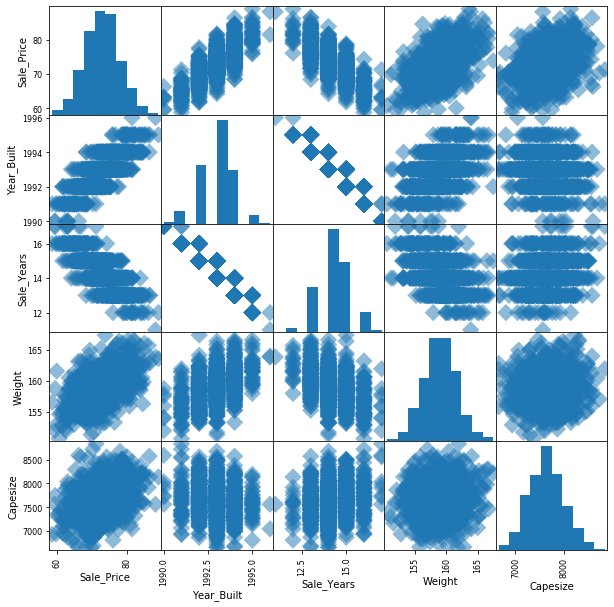

In [17]:
pd.plotting.scatter_matrix(sample_boost, 
                           s=150,marker='D',figsize=(10,10))
plt.show()

In [13]:
new_boost=sample_boost.drop('Year_Built',axis=1)
new_boost.head()

,Sale_Price,Sale_Years,Weight,Capesize
0,71.275000,15,160.650000,7639.291667
1,76.758333,15,160.516667,8147.833333
2,81.231250,14,161.352083,8053.895833
3,77.566667,13,158.587500,7619.812500
4,70.104167,15,154.768750,7637.437500


## Modeling- Linear Regression

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

### train & test

In [14]:
y_train=new_boost.Sale_Price
X_train=new_boost.drop('Sale_Price',axis=1)

In [15]:
X_test,y_test=df_boost.drop(['Sale_Price','Year_Built'],axis=1),df_boost.Sale_Price

### elasticnet

In [41]:
steps=[('scaler',StandardScaler()),('elasticnet',ElasticNet())]

In [42]:
pipeline=Pipeline(steps)

In [43]:
parameters={'elasticnet__l1_ratio':np.linspace(0,1,30)}

In [45]:
grid_ela=GridSearchCV(pipeline,parameters,cv=10)

In [47]:
grid_ela.fit(X_train,y_train)
r2=grid_ela.best_estimator_.score(X_test,y_test)

/Users/qiqintian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5969.001128699474, tolerance: 2.1138312217226076
  positive)
/Users/qiqintian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5942.520943958752, tolerance: 2.0806965078125
  positive)
/Users/qiqintian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5880.3956361091505, tolerance: 2.05178695171441
  positive)
/Users/qiqintian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge.

In [49]:
print('Tuned Elasticnet R squared:{}'.format(r2))

Tuned Elasticnet R squared:0.7672949714831702


In [51]:
grid_ela.best_params_

{'elasticnet__l1_ratio': 1.0}

In [54]:
y_pred=grid_ela.best_estimator_.predict(X_test)
mean_absolute_error(y_test,y_pred)

12.175843992500353

### Ridge

In [56]:
steps=[('scaler',StandardScaler()),('ridge',Ridge())]
pipeline=Pipeline(steps)
parameters={'ridge__alpha':np.logspace(-10, -2, 50)}

grid_lasso=GridSearchCV(pipeline,parameters,cv=10)
grid_lasso.fit(X,y)
r2=grid_lasso.best_estimator_.score(X_test,y_test)

In [57]:
print('Tuned Lasso R squared:{}'.format(r2))

Tuned Lasso R squared:0.9147984184868312


In [59]:
print('Tuned L2_Ratio:{}'.format(grid_lasso.best_params_))

Tuned L2_Ratio:{'ridge__alpha': 1e-10}


In [60]:
y_pred=grid_lasso.best_estimator_.predict(X_test)

In [61]:
mean_absolute_error(y_test,y_pred)

6.822350752732277

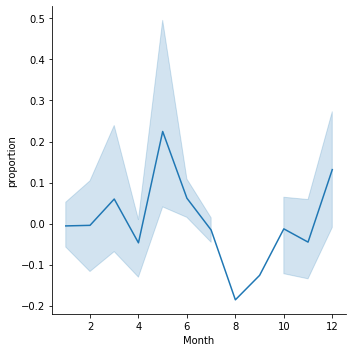

In [63]:
summary=pd.DataFrame({'proportion':(y_pred-y_test)/y_test,'Month':df.Sale_Month})
Month_val={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
summary.Month=summary.Month.map(Month_val)
sns.relplot(y='proportion',x='Month',kind='line',data=summary,markers=True)
plt.show()

### Regression Tree

In [64]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV

In [74]:
dt = DecisionTreeRegressor()
# Define params_dt
params_dt = {'max_depth':[1,2,3],
             'min_samples_leaf':[0.15,0.20,0.25,0.30]}
# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       n_jobs=-1)

In [75]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [0.15, 0.2, 0.25, 0.3]},
             scoring='neg_mean_squared_error')

In [76]:
r2=grid_dt.best_estimator_.score(X_test,y_test)
print('Tuned Lasso R squared:{}'.format(r2))

Tuned Lasso R squared:0.1474451569132711


In [78]:
y_pred=grid_dt.best_estimator_.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

25.128526335329173


### Random Forest Regression

In [79]:
# Instantiate rf
rf = RandomForestRegressor(oob_score=True)
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100,350,500],
             'max_depth':[1,2,3,4]}
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',  
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

In [143]:
grid_rf.fit(X_train,y_train)
r2=grid_rf.best_estimator_.score(X_test,y_test)
print('Tuned rf R squared:{}'.format(r2))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.6s finished


Tuned rf R squared:0.24078918866607046


### Random Forest - Original data

In [31]:
y=df_new.Sale_Price
X=df_new.drop(['Sale_Price','Year_Built'],axis=1)
X_dummy=pd.get_dummies(data=X,columns=['Sale_Month'],drop_first=True)

In [34]:
# split train & test
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_dummy,y,test_size=0.2,random_state=123)

### XGBoosting

In [141]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
import xgboost as xgb

In [188]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {'n_estimators': [50,100,150],
                  'max_depth': [2,3,4],
                  'learning_rate':[0.05,0.1],
                  'lambda':[1,10,50]}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
            cv=5,verbose=0,scoring='neg_mean_squared_error').fit(X_train,y_train)

In [189]:
grid_mse.best_params_

{'lambda': 10, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}

In [190]:
r2=grid_mse.best_estimator_.score(X_test,y_test)
print('Tuned xgb R squared:{}'.format(r2))

Tuned xgb R squared:0.3793175960908066


### XGBoosting- Original Data

In [32]:
# split train & test
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_dummy,y,test_size=0.2,random_state=123)

NameError: name 'train_test_split' is not defined

In [170]:
# Perform grid search: grid_mse
grid_xgb = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,
            cv=10,verbose=0,scoring='neg_mean_squared_error').fit(X_train_new,y_train_new)

In [171]:
r2=grid_xgb.best_estimator_.score(X_test_new,y_test_new)
print('Tuned xgb R squared:{}'.format(r2))

Tuned xgb R squared:0.9350557555955521


In [172]:
grid_xgb.best_params_

{'eta': 0.1, 'lambda': 1, 'max_depth': 2, 'n_estimators': 150}

In [180]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_dummy, label=y)
# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":2,'lambda':1,'eta':0.1}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=10,
                    seed=123,as_pandas=True,metrics='rmse',
                    early_stopping_rounds=10,num_boost_round=150)

# Print cv_results
print((cv_results["test-rmse-mean"]).tail(1))

[15:56:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is no

### AdaBoosting

In [192]:
from sklearn.ensemble import AdaBoostRegressor

In [194]:
dt=DecisionTreeRegressor(max_depth=1)
ada=AdaBoostRegressor(base_estimator=dt)
params={'n_estimators':[100,200,300],
        'learning_rate':[0.05,0.1]}

In [196]:
grid_ada= GridSearchCV(estimator=ada,
                       param_grid=params, 
                       cv = 5,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

In [199]:
grid_ada.fit(X_train,y_train)
r2=grid_ada.best_estimator_.score(X_test,y_test)
print('Tuned xgb R squared:{}'.format(r2))

Tuned xgb R squared:0.1667359590394082


In [200]:
# new sample train & test
grid_ada.fit(X_train_new,y_train_new)
r2=grid_ada.best_estimator_.score(X_test_new,y_test_new)
print('Tuned xgb R squared:{}'.format(r2))

Tuned xgb R squared:0.5927642743187209


### GradientBoosting

In [201]:
from sklearn.ensemble import GradientBoostingRegressor

In [205]:
params = {'learning_rate': [0.01,0.05,0.1],
          'max_depth': [2,3,4]}
# SGD
sgd = GradientBoostingRegressor(n_estimators=100,
                                 min_samples_split=20,
                                 subsample=0.8)
# grid search
grid_sgd= GridSearchCV(estimator=sgd,
                       param_grid=params, 
                       cv = 5,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

In [206]:
grid_sgd.fit(X_train,y_train)
r2=grid_sgd.best_estimator_.score(X_test,y_test)
print('Tuned xgb R squared:{}'.format(r2))

Tuned xgb R squared:0.4476556255234999


In [207]:
grid_sgd.fit(X_train_new,y_train_new)
r2=grid_sgd.best_estimator_.score(X_test_new,y_test_new)
print('Tuned xgb R squared:{}'.format(r2))

Tuned xgb R squared:0.9503044965290598


In [210]:
y_pred=grid_sgd.best_estimator_.predict(X_test_new)
print(mean_absolute_error(y_test_new,y_pred))

6.512878921874469


## Model Evaluation

In [215]:
# Define the list classifiers
classifiers=  [('Ridge', grid_lasso.best_estimator_), 
               ('Elasticnet', grid_ela.best_estimator_), 
               ('rf', grid_rf.best_estimator_),
               ('dt',grid_dt.best_estimator_),
               ('xgb',grid_xgb.best_estimator_),
               ('ada',grid_ada.best_estimator_),
               ('sgd',grid_sgd.best_estimator_)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    R2 = clf.score(X_test,y_test)
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, R2))

Ridge : 0.915
Elasticnet : 0.767
rf : 0.242
dt : 0.147
xgb : 0.435
ada : 0.105
sgd : 0.439


In [216]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train_new, y_train_new)    
   
    # Predict y_pred
    R2 = clf.score(X_test_new,y_test_new)
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, R2))

Ridge : 0.945
Elasticnet : 0.954
rf : 0.923
dt : 0.662
xgb : 0.935
ada : 0.608
sgd : 0.947


# Deep Learning Model

In [16]:
# Import batch normalization from keras layers
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam,SGD,RMSprop
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [17]:
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
opt = Adam(lr = 0.01)

# Build your deep network
model = Sequential()
model.add(Dense(150, input_shape=(3,), activation='relu', kernel_initializer='normal'))
model.add(BatchNormalization()) #BN
model.add(Dense(150, activation='relu', kernel_initializer='normal'))
model.add(BatchNormalization()) #BN
model.add(Dense(1))
model.compile(optimizer = opt, loss = 'mse')

In [19]:
# Early stop on validation accuracy
early_stop_monitor = EarlyStopping(patience = 10,monitor='val_loss',restore_best_weights=True)
# Save the best model as best_banknote_model.hdf5
model.fit(X_train,y_train,epochs=200,validation_data=(X_test, y_test),
                  callbacks=[early_stop_monitor],verbose=False,batch_size=64)


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [21]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Tuned R squared:{},\
      Tuned Mean Absolute Error:{}'.format(r2,mae))

Tuned R squared:0.9117498307906023,      Tuned Mean Absolute Error:7.034683704376221
